In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt 
from numpy.polynomial.polynomial import polyfit
from scipy import optimize

with open("airline_delay.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    data = [r for r in reader]

NUM = len(data)

In [2]:
totalyear=17
totalmonth = 12
delay_causes = 5

company_list =[]

airport_list = ['DFW','ORD','JFK','ATL','MIA']
selectcompnay_list = ['AA','UA','DL','WN','AS']
airport_num  = len(airport_list)
selectcompnay_num = len(selectcompnay_list)

for n in range (0,NUM):
  s=data[n]['carrier']
  if not s in company_list:
    company_list.append(s)

company_num = len(company_list)

year_plot = np.array(range(2003, 2020))
month_plot = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

delay_year_fly = np.zeros((company_num, totalyear, delay_causes))
delay_year_min = np.zeros((company_num, totalyear, delay_causes))


for n in range (0,NUM):
    company_index = company_list.index(data[n]['carrier'])
    year_index = int(data[n]['year'])-2003
    if (data[n]['arr_cancelled']):
        #print "n, year, company index: ", n, year_index, company_index
        delay_year_fly[company_index][year_index][0] += float(data[n]['carrier_ct'])
        delay_year_fly[company_index][year_index][1] += float(data[n]['weather_ct'])
        delay_year_fly[company_index][year_index][2] += float(data[n]['nas_ct'])
        delay_year_fly[company_index][year_index][3] += float(data[n]['security_ct'])
        delay_year_fly[company_index][year_index][4] += float(data[n]['late_aircraft_ct'])

        delay_year_min[company_index][year_index][0] += float(data[n]['carrier_delay'])
        delay_year_min[company_index][year_index][1] += float(data[n]['weather_delay'])
        delay_year_min[company_index][year_index][2] += float(data[n]['nas_delay'])
        delay_year_min[company_index][year_index][3] += float(data[n]['security_delay'])
        delay_year_min[company_index][year_index][4] += float(data[n]['late_aircraft_delay'])

plot_list_fly = [[] for x in range(delay_causes)]
plot_list_min = [[] for x in range(delay_causes)]

for cause in range (0,delay_causes):
    for year in range (0, totalyear):
        sum_company = 0
        for company in range (0,company_num):
          sum_company += delay_year_fly[company][year][cause]
        plot_list_fly[cause].append(sum_company)

for cause in range (0,delay_causes):
    for year in range (0, totalyear):
        sum_company = 0
        for company in range (0,company_num):
          sum_company += delay_year_min[company][year][cause]
        plot_list_min[cause].append(sum_company)


for year in range (0,totalyear):
    for cause in range (0,delay_causes):
        plot_list_min[cause][year] = plot_list_min[cause][year]/plot_list_fly[cause][year]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


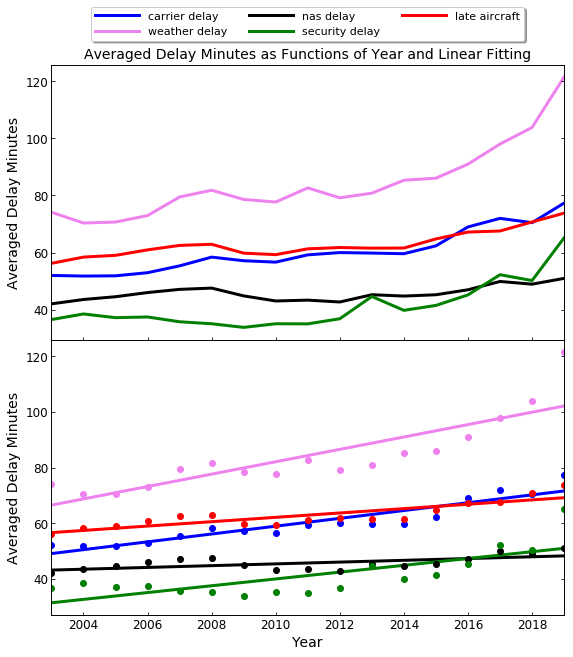

In [3]:
fig1 = plt.figure(figsize=(8,9))

ax1 = fig1.add_subplot(211)

ax1.plot(year_plot,plot_list_min[0],linewidth=3,color='b')
ax1.plot(year_plot,plot_list_min[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot_list_min[2],linewidth=3,color='black')
ax1.plot(year_plot,plot_list_min[3],linewidth=3,color='green')
ax1.plot(year_plot,plot_list_min[4],linewidth=3,color='red')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft'], fontsize=11,handlelength=4,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=3)
ax1.set_ylabel('Averaged Delay Minutes',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('Averaged Delay Minutes as Functions of Year and Linear Fitting',fontsize=14)


plt.subplots_adjust(hspace=0)


ax2 = fig1.add_subplot(212)


b0, m0 = polyfit(year_plot, plot_list_min[0], 1)
b1, m1 = polyfit(year_plot, plot_list_min[1], 1)
b2, m2 = polyfit(year_plot, plot_list_min[2], 1)
b3, m3 = polyfit(year_plot, plot_list_min[3], 1)
b4, m4 = polyfit(year_plot, plot_list_min[4], 1)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')

ax2.plot(year_plot,plot_list_min[0],'o',color='b')
ax2.plot(year_plot,plot_list_min[1],'o',color='violet')
ax2.plot(year_plot,plot_list_min[2],'o',color='black')
ax2.plot(year_plot,plot_list_min[3],'o',color='green')
ax2.plot(year_plot,plot_list_min[4],'o',color='red')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Averaged Delay Minutes',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig1.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)